In [1]:
import pandas as pd
import numpy as np
# Load data
df_raw = pd.read_csv("data.csv", index_col=[0])
# Drop empty column
df_raw=df_raw.drop('Unnamed: 32', axis=1)

In [2]:
# Turn B and M into 0 and 1
one_hot_df = pd.get_dummies(df_raw, drop_first=True)

In [3]:
one_hot_df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [9]:
# Set target and features
target = one_hot_df['diagnosis_M']
one_hot_df_indep = one_hot_df.drop('diagnosis_M', axis=1)

In [5]:
# Standardise the One-hot encoded features

std_features = (one_hot_df_indep.apply(lambda x : (x - np.mean(x)) / np.std(x)))
std_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [6]:
# Split into train and test data
from sklearn.model_selection import train_test_split, GridSearchCV

X = one_hot_df_indep.values

X_train, X_test, y_train, y_test  = train_test_split(X, target, test_size = 0.2)

In [21]:
# Decision tree 1

#Import Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier

# Initiating Decision Tree Classifier model
clf_dt1 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=20, 
                             min_samples_leaf=10, max_features=None)

# Fit your Decision Tree model to your train model
clf_dt1.fit(X_train, y_train)

# Predict labels on your Test set of independent variables
pred_clf_dt1 = clf_dt1.predict(X_test)
# Predict probabilities on your Test set of independent variables
proba_clf_dt1 = clf_dt1.predict_proba(X_test)

In [22]:
proba_clf_dt1

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.61111111, 0.38888889],
       [0.73333333, 0.26666667],
       [0.        , 1.        ],
       [0.3       , 0.7       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.61111111, 0.38888889],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.61111111, 0.38888889],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

In [13]:
pred_clf_dt1

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0], dtype=uint8)

In [23]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred_clf_dt1))

Accuracy: 0.8859649122807017


In [24]:
#Confusion matrix, to see where our classifier is making mistakes:
print(metrics.confusion_matrix(y_test, pred_clf_dt1))

[[66  9]
 [ 4 35]]


In [25]:
# Other evaluation metrics...
print(metrics.classification_report(y_test, pred_clf_dt1))

auc = metrics.roc_auc_score(y_test, proba_clf_dt1[:,1])
print("AUC: ", auc)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        75
           1       0.80      0.90      0.84        39

    accuracy                           0.89       114
   macro avg       0.87      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

AUC:  0.9405128205128205


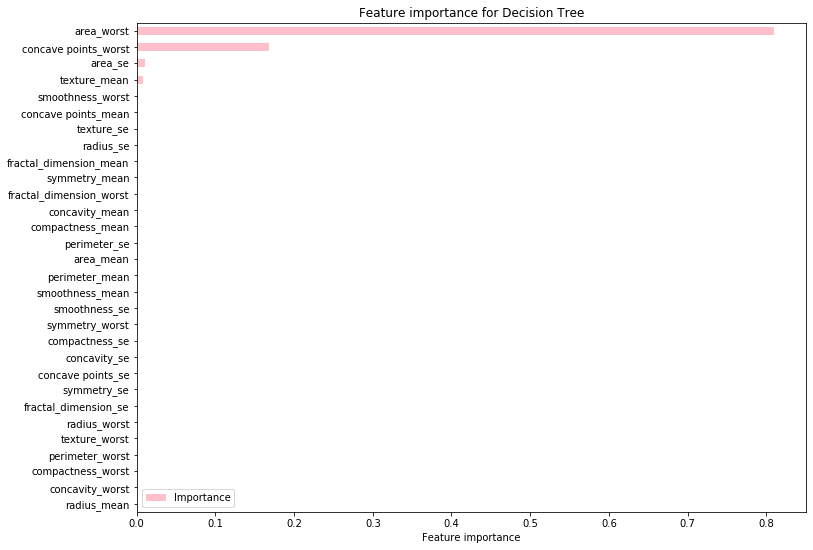

In [26]:
# Plot feature importance
from matplotlib import pyplot as plt
features_log = pd.DataFrame(clf_dt1.feature_importances_, index = one_hot_df_indep.columns.tolist(), 
                            columns = ['Importance'])
features_log = features_log.sort_values(by='Importance', ascending=True)

features_log.plot(kind='barh', figsize=(12,9), color = 'pink')
plt.xlabel('Feature importance')
plt.title('Feature importance for Decision Tree')
plt.show()

In [75]:
# Decision tree 2

# Initiating Decision Tree Classifier model
clf_dt2= DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=10, min_samples_split=20, 
                             min_samples_leaf=200, max_features=None)

# Fit your Decision Tree model to your train model
clf_dt2.fit(X_train, y_train)

# Predict labels on your Test set of independent variables
pred_clf_dt2 = clf_dt1.predict(X_test)
# Predict probabilities on your Test set of independent variables
proba_clf_dt2 = clf_dt1.predict_proba(X_test)

In [76]:
proba_clf_dt2

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.61111111, 0.38888889],
       [0.73333333, 0.26666667],
       [0.        , 1.        ],
       [0.3       , 0.7       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.61111111, 0.38888889],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.61111111, 0.38888889],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

In [77]:
pred_clf_dt2

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0], dtype=uint8)

In [78]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred_clf_dt2))

Accuracy: 0.8859649122807017


In [79]:
#Confusion matrix, to see where our classifier is making mistakes:
print(metrics.confusion_matrix(y_test, pred_clf_dt2))

[[66  9]
 [ 4 35]]


In [80]:
# Other evaluation metrics...
print(metrics.classification_report(y_test, pred_clf_dt2))

auc = metrics.roc_auc_score(y_test, proba_clf_dt2[:,1])
print("AUC: ", auc)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        75
           1       0.80      0.90      0.84        39

    accuracy                           0.89       114
   macro avg       0.87      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

AUC:  0.9405128205128205


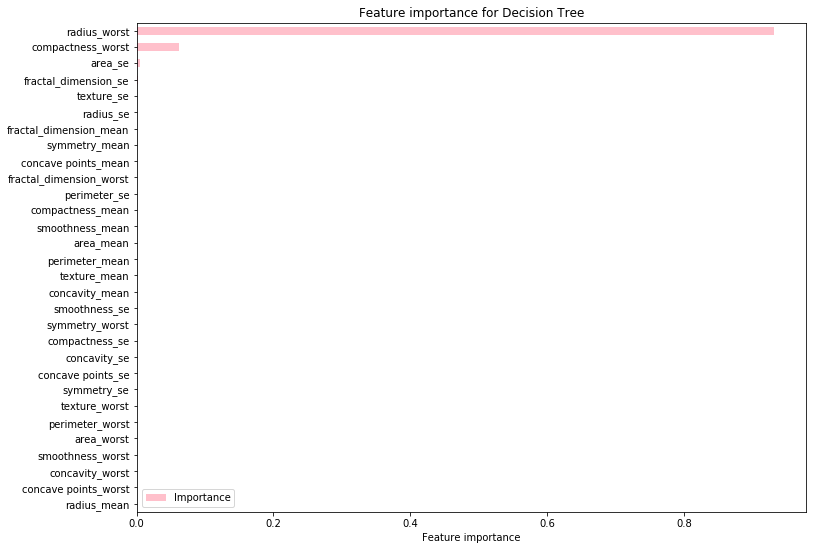

In [74]:
# Plot feature importance
from matplotlib import pyplot as plt
features_log = pd.DataFrame(clf_dt2.feature_importances_, index = one_hot_df_indep.columns.tolist(), 
                            columns = ['Importance'])
features_log = features_log.sort_values(by='Importance', ascending=True)

features_log.plot(kind='barh', figsize=(12,9), color = 'pink')
plt.xlabel('Feature importance')
plt.title('Feature importance for Decision Tree')
plt.show()